# Cleaning and analyzing the datas

We prepare and analyze the news that we obtained from the archives in La Presse and Le Journal de Montreal for a text classification training. 

We use the datas that we obtained from the archives as training datas, and the datas that we obtained from the most recent news as test datas. 

We call the relevant libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)

We read the different data sets that we put in csv files. 

In [3]:
df_jdm_recent = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_journal_de_montreal_090620.csv', index_col=0)
df_lp_recent = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_lapresse_090520.csv', index_col=0)
df_lp_archiv = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_lapresse_archives.csv', index_col=0)
df_jdm_archiv = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_le_journal_de_montreal_archives.csv', index_col=0)

In [4]:
#Create the training set
df_train = df_lp_archiv.append(df_jdm_archiv).reset_index(drop=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Data columns (total 4 columns):
title       12402 non-null object
content     12402 non-null object
link        12402 non-null object
category    12402 non-null object
dtypes: object(4)
memory usage: 387.7+ KB


In [6]:
df_train.sample(20)

,title,content,link,category
513,Des résidants de Naples mettent le feu aux mon...,Plus de 50 incendies ont été déclenchés dans l...,https://www.lapresse.ca/international/europe/2...,international
7032,Un énorme flétan pêché en Gaspésie,PORT-DANIEL-GASCONS | Des pêcheurs de la Gasp...,https://www.journaldemontreal.com/2018/08/21/u...,actualites
8145,«Marchands de bonheur» depuis des décennies,"Ils existent depuis des décennies, ils sont ch...",https://www.journaldemontreal.com/2020/02/18/c...,actualites
8908,Trump met fin à des accords préférentiels,WASHINGTON | Les États-Unis vont mettre fin à ...,https://www.journaldemontreal.com/2019/03/04/c...,international
10462,Le sourire d’Ulysse,Lorsqu’un boxeur est en pleine ascension comm...,https://www.journaldemontreal.com/2017/10/25/l...,sports
5335,Espagne: le bilan de la COVID-19 repart à la h...,(Madrid) Le bilan quotidien de la pandémie de ...,https://www.lapresse.ca/international/europe/2...,international
4707,"Face à Microsoft, Apple défend son trône d'ent...",Après avoir été brièvement détrônée par Micros...,https://www.lapresse.ca/affaires/marches/20181...,affaires
12283,Un rappeur canadien assassiné à Toronto,"TORONTO | Le rappeur ontarien Houdini, qui jou...",https://www.journaldemontreal.com/2020/05/27/u...,culture
2385,La captive de Mitterrand obtient le prix Roger...,"La captive de Mitterrand, de David Le Bailly, ...",https://www.lapresse.ca/arts/livres/201406/03/...,culture
2190,Le vieillissement variera beaucoup selon les r...,La population du Québec devrait augmenter d'en...,https://www.lapresse.ca/actualites/national/20...,actualites


In [7]:
#Create the test set
df_test = df_lp_recent.append(df_jdm_recent).reset_index(drop=True)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 4 columns):
title       1476 non-null object
content     1476 non-null object
link        1476 non-null object
category    1476 non-null object
dtypes: object(4)
memory usage: 46.2+ KB


In [9]:
df_test.sample(20)

,title,content,link,category
956,Une universitaire blanche prétendait être noire,Une professeure américaine qui se présentait c...,https://www.journaldemontreal.com/2020/09/04/u...,international
215,Pakistan: première manifestation contre la une...,(Muzaffarabad) Une centaine de manifestants on...,https://www.lapresse.ca/international/asie-et-...,international
425,Plus de 35 000$ à Enfant Soleil,"Grâce à l’appui de son vaste réseau, HGrégoire...",https://www.lapresse.ca/affaires/tetes-d-affic...,affaires
77,Une femme grièvement blessée après une collisi...,(Saint-Tite) Une femme a subi des blessures gr...,https://www.lapresse.ca/actualites/justice-et-...,actualites
670,André Alexis souligne l’importance du «sens du...,André Alexis souligne l’importance de s’accroc...,https://www.lapresse.ca/arts/theatre/2020-08-1...,culture
486,Black Lives Matter : le coproprio des Giants s...,(East Rutherford) Depuis longtemps en faveur d...,https://www.lapresse.ca/sports/football/2020-0...,sports
152,Saguenay: «Ça pourrait être le coup de grâce p...,GNL Québec. Usine de transformation de Métaux ...,https://www.lapresse.ca/actualites/environneme...,actualites
1395,Ademo placé en garde à vue pour «rébellion»,"Le rappeur Ademo, l'un des deux frères du grou...",https://www.journaldemontreal.com/2020/09/05/l...,culture
1,Explosion à Beyrouth: Ottawa facilitera la ven...,(Ottawa) Un mois après la tragédie de Beyrouth...,https://www.lapresse.ca/actualites/national/20...,actualites
821,De l’espoir face à ces grandes avancées,Les espoirs sont permis pour que les six proch...,https://www.journaldemontreal.com/2020/09/05/l...,actualites


In [10]:
# Put all the datas in the same dataframe
df_all = df_train.append(df_test).reset_index(drop=True)

dfs = [df_train, df_test]

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13878 entries, 0 to 13877
Data columns (total 4 columns):
title       13878 non-null object
content     13878 non-null object
link        13878 non-null object
category    13878 non-null object
dtypes: object(4)
memory usage: 433.8+ KB


In [12]:
#Add names
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

### Data Analysis

#### Number of articles in each category

We check whether our data set is balanced, that is, there is approximately the same amount of articles in each category. 

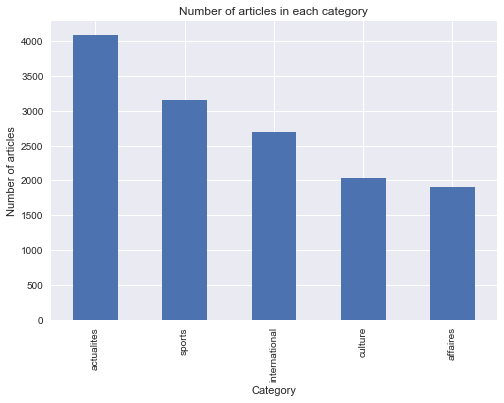

In [13]:
# Draw a vertical bar chart

ax = df_all['category'].value_counts().plot(kind = 'bar', title = 'Number of articles in each category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of articles')

plt.show()

The data set is not perfectly balanced, but it should be ok for our models. We will keep this in mind when we choose our accuracy metrics. 

#### News length

As we will create features involving the key words that appear the most often, it is important that different categories don't have articles with very different length. So we check that. 

In [14]:
df_all['news_length'] = df_all['content'].str.len()

In [15]:
df_all['news_length'].describe()

count    13878.000000
mean      2635.137772
std       1898.076613
min          1.000000
25%       1433.000000
50%       2319.000000
75%       3456.000000
max      72018.000000
Name: news_length, dtype: float64

There is an article with only one character. Let's investigate those with less than 200 characters.

In [16]:
# Dataframe with articles of length less than 200 characters
df_less200 = df_all[df_all['news_length']<200]
len(df_less200)

89

We check them.

In [17]:
df_less200.head(200)

,title,content,link,category,news_length
1,Mon clin d'oeil du lundi 21 février 2011,"François Legault est sorti de son trou, il n'a...",https://www.lapresse.ca/actualites/le-clin-doe...,actualites,109
151,Mon clin d'oeil du lundi 4 juillet 2011,Il faut être prince ou princesse pour pouvoir ...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,87
207,Ailleurs sur le web: macédoine du week-end,Ce fut un week-end extrêmement chargé dans le ...,https://www.lapresse.ca/sports/201107/04/01-44...,sports,174
271,Mon clin d'oeil du mardi 1 février 2011,"«Tasse-toi, Moubarak! J'ai un nom prédestiné p...",https://www.lapresse.ca/actualites/le-clin-doe...,actualites,87
548,Mon clin d'oeil du jeudi 9 juin 2011,Qui aurait dit qu'un jour les New Kids On The ...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,109
612,Vos plus beaux souvenirs de Claude Léveillée,Quels sont vos plus beaux souvenirs de Claude ...,https://www.lapresse.ca/arts/201106/09/01-4407...,culture,129
705,Le sondage du jour,La plupart des républicains (54%) et des parti...,https://www.lapresse.ca/international/201805/0...,international,176
792,Mon clin d'oeil du mardi 8 mai 2012,"Il faudrait interdire les masques, pas juste d...",https://www.lapresse.ca/actualites/le-clin-doe...,actualites,113
853,Ailleurs sur le web: les règles non écrites du...,"Au baseball, il y a une tonne de lois non écri...",https://www.lapresse.ca/sports/201205/08/01-45...,sports,194
945,Mon clin d'oeil du jeudi 5 janvier 2012,Il n'y a pas trop de politique dans le Bye Bye...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,95


We see that the datas with less than 150 characters either contain empty articles, or 'Clins d'oeil','clavardag', or 'relisez' or other irrelevant datas. We remove those from our dataset.  

In [18]:
df_test['news_length'] = df_test['content'].str.len()
df_test = df_test[df_test['news_length']>150]
df_train['news_length'] = df_train['content'].str.len()
df_train = df_train[df_train['news_length']>150]
df_all = df_all[df_all['news_length']>150]

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1475
Data columns (total 5 columns):
title          1472 non-null object
content        1472 non-null object
link           1472 non-null object
category       1472 non-null object
news_length    1472 non-null int64
dtypes: int64(1), object(4)
memory usage: 69.0+ KB


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12335 entries, 0 to 12401
Data columns (total 5 columns):
title          12335 non-null object
content        12335 non-null object
link           12335 non-null object
category       12335 non-null object
news_length    12335 non-null int64
dtypes: int64(1), object(4)
memory usage: 578.2+ KB


In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13807 entries, 0 to 13877
Data columns (total 5 columns):
title          13807 non-null object
content        13807 non-null object
link           13807 non-null object
category       13807 non-null object
news_length    13807 non-null int64
dtypes: int64(1), object(4)
memory usage: 647.2+ KB


In [22]:
df_all['news_length'].describe()

count    13807.000000
mean      2648.281162
std       1894.054235
min        153.000000
25%       1446.500000
50%       2327.000000
75%       3467.500000
max      72018.000000
Name: news_length, dtype: float64

We check again the smallest article to see if we have unwanted datas in our dataset. 

In [23]:
df_all[df_all['news_length']==153].head(10)

,title,content,link,category,news_length
3604,Flyers 2 - Canadien 3 (marque finale),Relisez le clavardage du match opposant le Can...,https://www.lapresse.ca/sports/hockey/clavarda...,sports,153


It contains a 'clavardage', which is also not a news article. We check all the articles containing the words 'clavardage'.

In [24]:
clavardage = df_all['content'].str.contains("clavardage") | df_all['content'].str.contains("Clavardage")
df_clavardage = df_all[clavardage]
len(df_clavardage)

7

In [25]:
df_clavardage.head(10)

,title,content,link,category,news_length
542,Trois ans pour Andrei Markov: rassurez-vous...,Le Canadien n'a pas hésité à mettre sous contr...,https://www.lapresse.ca/sports/mathias-brunet/...,sports,1050
1449,Argo remporte l'Oscar du meilleur film,Daniel Day-Lewis a marqué une page d'histoire ...,https://www.lapresse.ca/cinema/ceremonies/osca...,culture,352
2917,Blue Jackets 1 - Canadien 3 (pointage final),Relisez le clavardage de l'affrontement entre ...,https://www.lapresse.ca/sports/hockey/clavarda...,sports,159
3604,Flyers 2 - Canadien 3 (marque finale),Relisez le clavardage du match opposant le Can...,https://www.lapresse.ca/sports/hockey/clavarda...,sports,153
12165,Quand les vedettes partent avec leurs accessoi...,Quand on a un rôle marquant ou qu’on réalise ...,https://www.journaldemontreal.com/2019/01/19/q...,culture,4599
12362,La téléréalité en mode quarantaine,La simple idée de voir des rassemblements – mê...,https://www.journaldemontreal.com/2020/03/24/l...,culture,2718
13072,André Alexis souligne l’importance du «sens du...,André Alexis souligne l’importance de s’accroc...,https://www.lapresse.ca/arts/theatre/2020-08-1...,culture,3232


There are only a few of such articles. We keep them as other articles containing the word 'clavardage' are important. Moreover, there are key words in those articles that will probably make those articles easy to classify.  

We now check the distribution of news length.

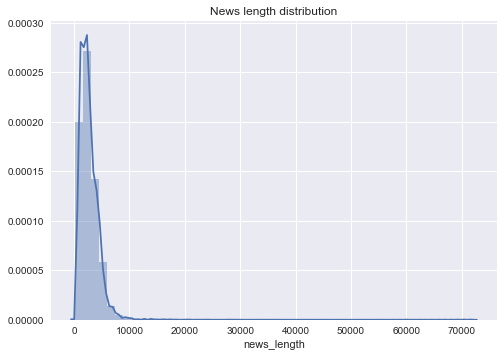

In [26]:
plt.figure()
sns.distplot(df_all['news_length']).set_title('News length distribution');
plt.show()

We see that most datas have less than 10000 characters. We investigate to see what happens with those with more than 10000 characters. 

In [27]:
# Dataframe with articles of length more than 10000 characters
df_more10k = df_all[df_all['news_length']>10000]
len(df_more10k)

62

We check one.

In [28]:
df_more10k['content'].iloc[42]

'Départs massifs\xa0– dont celui de la procureure principale dans l’affaire du vol de données chez Desjardins –, recrutement de procureurs peu expérimentés, délais dans l’attribution de dossiers qui font grincer des dents les policiers\xa0: le Bureau de la grande criminalité et des affaires spéciales semble avoir du mal à prendre son élan depuis sa création à la suite de l’échec des superprocès SharQc. Créé à l’automne 2015, le Bureau de la grande criminalité et des affaires spéciales rassemble les procureurs affectés aux grandes enquêtes contre le crime organisé au Québec. Il devait permettre une plus grande flexibilité dans la lutte de l’État contre les réseaux criminels. Mais les policiers déplorent plutôt des délais qui nuisent à des enquêtes et qui coûtent cher, et des suspects qui filent entre les mailles du filet.  Des procureurs, eux, parlent d’un fleuron un peu flétri par une véritable saignée qui se traduit par le départ de 60 d’entre eux, de problèmes de recrutement et de mi

They just seem to be very long articles, so we keep them.

We boxplot the news length. 

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


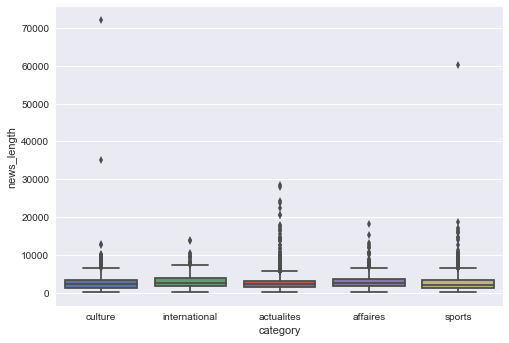

In [29]:
plt.figure()
sns.boxplot(data=df_all, x='category', y='news_length');
plt.show()

We remove the extreme values to get a more readable plot. 

In [30]:
quantile_95 = df_all['news_length'].quantile(0.95)
df_95 = df_all[df_all['news_length'] < quantile_95]

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


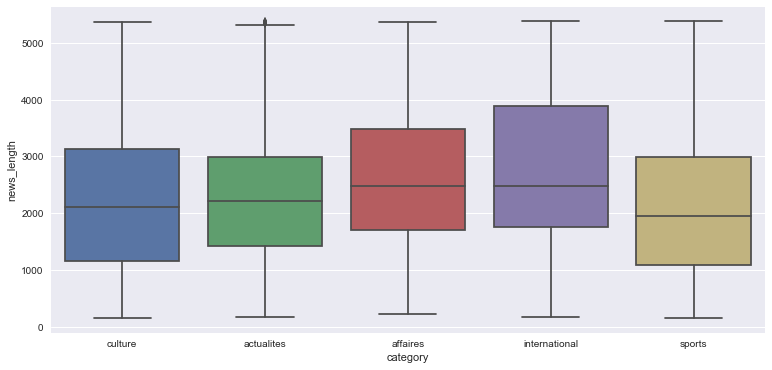

In [31]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='category', y='news_length');
plt.show()

We see that the length distribution is fairly similar for each category, except maybe for sports, so it should not be a problem in our models. We will still normalize the features to avoid that the count of words influence the feature engineering process. 

### Text Cleaning

We perform the following cleaning: 
- Special characters
- Capitalized words
- Punctuation 
- Stemming
- Remove stop words 
- Words with "'" such as "l'école"

The library nltk will be very useful for this. Unfortunately, it is more difficult to find good stemmer for French texts, but snowball seems to do the thrick. 

In [32]:
import nltk
from nltk.corpus import stopwords
StopWords = stopwords.words('french')
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

#### Special characters

We first remove the special characters '\xa0', '\n', '«', '»', '$', '(...)', '(', ')'. 

In [33]:
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'content'].str.replace("\xa0", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\n", " ").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("«", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("»", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\$", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\(...\)", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\(", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\)", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("  ", " ").copy()

df_test.loc[:,'cleaned_content'] = df_test.loc[:,'content'].str.replace("\xa0", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\n", " ").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("«", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("»", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\$", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\(...\)", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\(", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\)", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("  ", " ").copy()

df_train.loc[:,'cleaned_content'] = df_train.loc[:,'content'].str.replace("\xa0", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\n", " ").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("«", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("»", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\$", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\(...\)", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\(", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\)", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("  ", " ").copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
df_train['cleaned_content'].iloc[42]

"La forestière Tembec T.TMB ferme sa scierie de Taschereau, en Abitibi-Témiscamingue, invoquant un manque d'approvisionnement en bois. Ces installations étaient inactives depuis octobre 2009, a indiqué l'entreprise québécoise un communiqué. La fermeture était devenue nécessaire pour assurer la rentabilité à long terme des scieries de Béarn et de La Sarre, a expliqué Dennis Rounsville, président du Groupe des produits forestiers de Tembec. Pour survivre dans un marché de plus en plus concurrentiel, les scieries doivent compter sur un approvisionnement en bois suffisant, a-t-il ajouté. Tembec espère que Québec lui permettra de transférer à ses autres scieries d'Abitibi-Témiscamingue les volumes de bois qui étaient rattachés à la scierie de Taschereau. L'entreprise promet d'aider les employés touchés en explorant notamment la possibilité d'en muter certains vers d'autres usines. Un fonds d'adaptation des collectivités sera également mis sur pied avec le concours de la municipalité de Tasc

#### Capitalized words

In [35]:
#Lowercasing the text
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.lower().copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.lower().copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.lower().copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
df_train['cleaned_content'].iloc[42]

"la forestière tembec t.tmb ferme sa scierie de taschereau, en abitibi-témiscamingue, invoquant un manque d'approvisionnement en bois. ces installations étaient inactives depuis octobre 2009, a indiqué l'entreprise québécoise un communiqué. la fermeture était devenue nécessaire pour assurer la rentabilité à long terme des scieries de béarn et de la sarre, a expliqué dennis rounsville, président du groupe des produits forestiers de tembec. pour survivre dans un marché de plus en plus concurrentiel, les scieries doivent compter sur un approvisionnement en bois suffisant, a-t-il ajouté. tembec espère que québec lui permettra de transférer à ses autres scieries d'abitibi-témiscamingue les volumes de bois qui étaient rattachés à la scierie de taschereau. l'entreprise promet d'aider les employés touchés en explorant notamment la possibilité d'en muter certains vers d'autres usines. un fonds d'adaptation des collectivités sera également mis sur pied avec le concours de la municipalité de tasc

#### Punctuation

In [37]:
punc = list("?:!.,;%")
for p in punc:
    df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace(p,'').copy()
    df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace(p,'').copy()
    df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace(p,'').copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
df_train['cleaned_content'].iloc[42]

"la forestière tembec ttmb ferme sa scierie de taschereau en abitibi-témiscamingue invoquant un manque d'approvisionnement en bois ces installations étaient inactives depuis octobre 2009 a indiqué l'entreprise québécoise un communiqué la fermeture était devenue nécessaire pour assurer la rentabilité à long terme des scieries de béarn et de la sarre a expliqué dennis rounsville président du groupe des produits forestiers de tembec pour survivre dans un marché de plus en plus concurrentiel les scieries doivent compter sur un approvisionnement en bois suffisant a-t-il ajouté tembec espère que québec lui permettra de transférer à ses autres scieries d'abitibi-témiscamingue les volumes de bois qui étaient rattachés à la scierie de taschereau l'entreprise promet d'aider les employés touchés en explorant notamment la possibilité d'en muter certains vers d'autres usines un fonds d'adaptation des collectivités sera également mis sur pied avec le concours de la municipalité de taschereau la ferm

#### Words with " ' "

In [39]:
apo = ["l'", "d'", "qu'", "j'"]
for p in apo:
    df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace(p,'').copy()
    df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace(p,'').copy()
    df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace(p,'').copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
df_train['cleaned_content'].iloc[42]

'la forestière tembec ttmb ferme sa scierie de taschereau en abitibi-témiscamingue invoquant un manque approvisionnement en bois ces installations étaient inactives depuis octobre 2009 a indiqué entreprise québécoise un communiqué la fermeture était devenue nécessaire pour assurer la rentabilité à long terme des scieries de béarn et de la sarre a expliqué dennis rounsville président du groupe des produits forestiers de tembec pour survivre dans un marché de plus en plus concurrentiel les scieries doivent compter sur un approvisionnement en bois suffisant a-t-il ajouté tembec espère que québec lui permettra de transférer à ses autres scieries abitibi-témiscamingue les volumes de bois qui étaient rattachés à la scierie de taschereau entreprise promet aider les employés touchés en explorant notamment la possibilité en muter certains vers autres usines un fonds adaptation des collectivités sera également mis sur pied avec le concours de la municipalité de taschereau la fermeture de la scie

#### Stop words

In [41]:
for stop_word in StopWords:
    df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace(r"\b" + stop_word + r"\b", '').copy()
    df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace(r"\b" + stop_word + r"\b", '').copy()
    df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace(r"\b" + stop_word + r"\b", '').copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
df_train['cleaned_content'].iloc[42]

' forestière tembec ttmb ferme  scierie  taschereau  abitibi-témiscamingue invoquant  manque approvisionnement  bois  installations  inactives depuis octobre 2009 a indiqué entreprise québécoise  communiqué  fermeture  devenue nécessaire  assurer  rentabilité  long terme  scieries  béarn    sarre a expliqué dennis rounsville président  groupe  produits forestiers  tembec  survivre   marché  plus  plus concurrentiel  scieries doivent compter   approvisionnement  bois suffisant a-- ajouté tembec espère  québec  permettra  transférer   autres scieries abitibi-témiscamingue  volumes  bois   rattachés   scierie  taschereau entreprise promet aider  employés touchés  explorant notamment  possibilité  muter certains vers autres usines  fonds adaptation  collectivités  également mis  pied   concours   municipalité  taschereau  fermeture   scierie  taschereau  traduira   charge non récurrente  2 millions  tembec   trimestre  prendra fin  mois prochain'

We remove '-', 'a', "'" and '%'.

In [43]:
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\-", "").copy()
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace(r"\b" + "a" + r"\b", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\-", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace(r"\b" + "a" + r"\b", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\-", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace(r"\b" + "a" + r"\b", "").copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
df_all.loc[:,'cleaned_content'] = df_all.loc[:,'cleaned_content'].str.replace("\'", "").copy()
df_test.loc[:,'cleaned_content'] = df_test.loc[:,'cleaned_content'].str.replace("\'", "").copy()
df_train.loc[:,'cleaned_content'] = df_train.loc[:,'cleaned_content'].str.replace("\'", "").copy()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
df_train['cleaned_content'].iloc[42]

' forestière tembec ttmb ferme  scierie  taschereau  abitibitémiscamingue invoquant  manque approvisionnement  bois  installations  inactives depuis octobre 2009  indiqué entreprise québécoise  communiqué  fermeture  devenue nécessaire  assurer  rentabilité  long terme  scieries  béarn    sarre  expliqué dennis rounsville président  groupe  produits forestiers  tembec  survivre   marché  plus  plus concurrentiel  scieries doivent compter   approvisionnement  bois suffisant  ajouté tembec espère  québec  permettra  transférer   autres scieries abitibitémiscamingue  volumes  bois   rattachés   scierie  taschereau entreprise promet aider  employés touchés  explorant notamment  possibilité  muter certains vers autres usines  fonds adaptation  collectivités  également mis  pied   concours   municipalité  taschereau  fermeture   scierie  taschereau  traduira   charge non récurrente  2 millions  tembec   trimestre  prendra fin  mois prochain'

#### Saving the files

We save the files and proceed with Stemming in another document. 

In [57]:
df_all.to_csv('cleaned_all.csv', header=True, index = True)

In [49]:
df_train.to_csv('cleaned_train.csv', header=True, index = True)

In [50]:
df_test.to_csv('cleaned_test.csv', header=True, index=True)